# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis (EDA) on the cleaned marketing campaigns dataset. The goal is to answer key analytical questions and gain insights into campaign performance.

## Objectives
1. Identify the most frequently used marketing channel and the one with the best ROI.
2. Determine which type of campaign generates the most revenue and has the best conversion rate.
3. Analyze the distribution of ROI and identify factors associated with high ROI.
4. Compare conversion rates between B2B and B2C audiences.
5. Identify the campaign with the highest net profit and analyze its characteristics.
6. Examine the correlation between budget and revenue.
7. Identify campaigns with ROI > 0.5 and revenue > 500,000.
8. Explore seasonal or temporal patterns in campaign performance.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_path = "/Users/patriciajaquez/Documents/GitHub/module1_project/data/processed/marketingcampaigns_clean.csv"
df = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Overview:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())

Dataset Overview:
                                   campaign_name  start_date    end_date  \
0            public-key multi-tasking throughput  2023-04-01  2024-02-23   
1             de-engineered analyzing task-force  2023-02-15  2024-04-22   
2  balanced solution-oriented local area network  2022-12-20  2023-10-11   
3              distributed real-time methodology  2022-09-26  2023-09-27   
4            front-line executive infrastructure  2023-07-07  2024-05-15   

     budget    roi          type target_audience    channel  conversion_rate  \
0   8082.30  86.80         email             B2B    organic             0.40   
1  17712.98  28.17         email             B2C  promotion             0.66   
2  84643.10   4.41       podcast             B2B       paid             0.28   
3  14589.75   5.17       webinar             B2B    organic             0.19   
4  39291.90   0.21  social media             B2B  promotion             0.81   

     revenue  net_profit  start_year  start_

## Question 1: What is the most frequently used marketing channel, and which generates the best ROI?

### Objective:
Analyze the distribution of marketing channels and compare their performance in terms of ROI.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/776511664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")


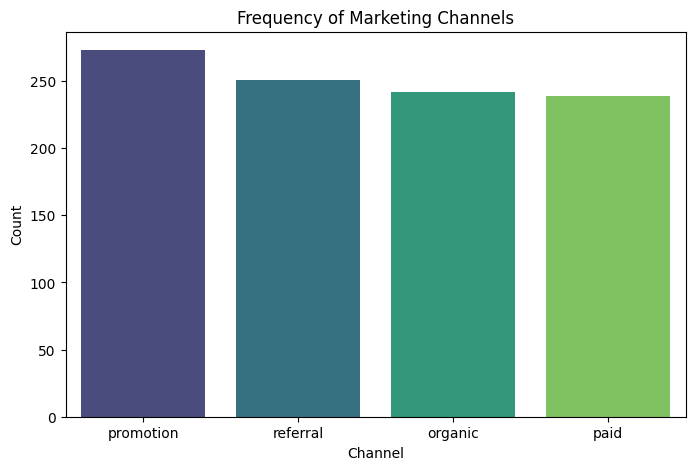

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/776511664.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='roi', data=df, palette="viridis")


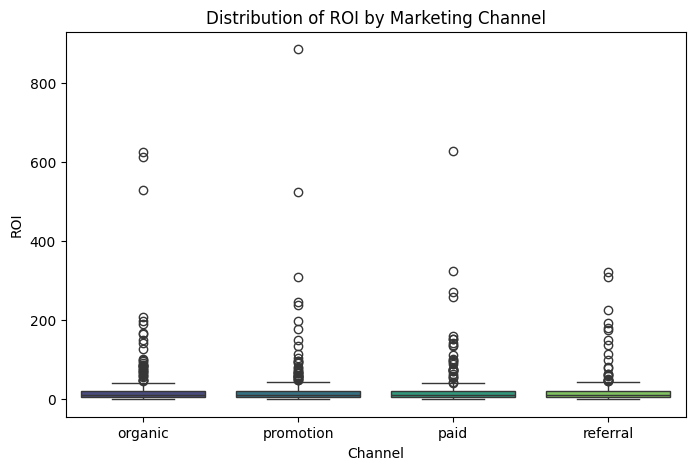

In [3]:
# Frequency of marketing channels
channel_counts = df['channel'].value_counts()

# Plot the frequency of channels
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")
plt.title("Frequency of Marketing Channels")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

# Boxplot of ROI by channel
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='roi', data=df, palette="viridis")
plt.title("Distribution of ROI by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.show()

## Question 2: What type of campaign generates the most revenue and has the best conversion rate?

### Objective:
Compare campaign types based on average revenue and conversion rate.

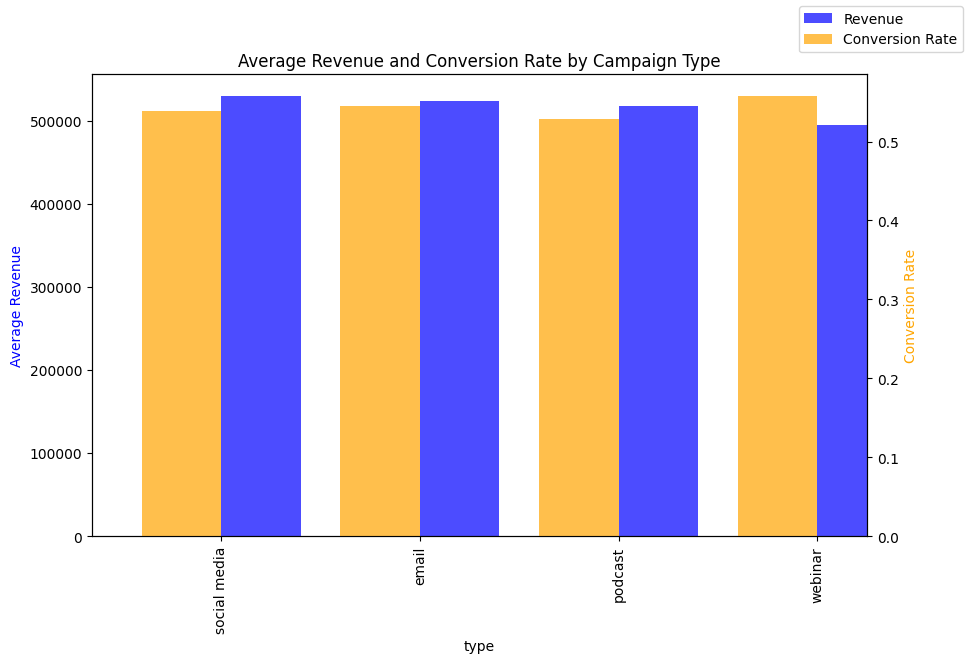

In [5]:
# Group by campaign type and calculate mean revenue and conversion rate
campaign_performance = df.groupby('type')[['revenue', 'conversion_rate']].mean().sort_values(by='revenue', ascending=False)

# Plot average revenue and conversion rate by campaign type
fig, ax1 = plt.subplots(figsize=(10, 6))
campaign_performance['revenue'].plot(kind='bar', color='blue', alpha=0.7, ax=ax1, position=0, width=0.4, label='Revenue')
ax1.set_ylabel('Average Revenue', color='blue')
ax1.set_title("Average Revenue and Conversion Rate by Campaign Type")

ax2 = ax1.twinx()
campaign_performance['conversion_rate'].plot(kind='bar', color='orange', alpha=0.7, ax=ax2, position=1, width=0.4, label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='orange')

fig.legend(loc="upper right")
plt.show()

## Question 3: How is ROI distributed, and what factors are associated with high ROI?

### Objective:
Analyze the distribution of ROI and identify patterns or factors associated with high ROI.

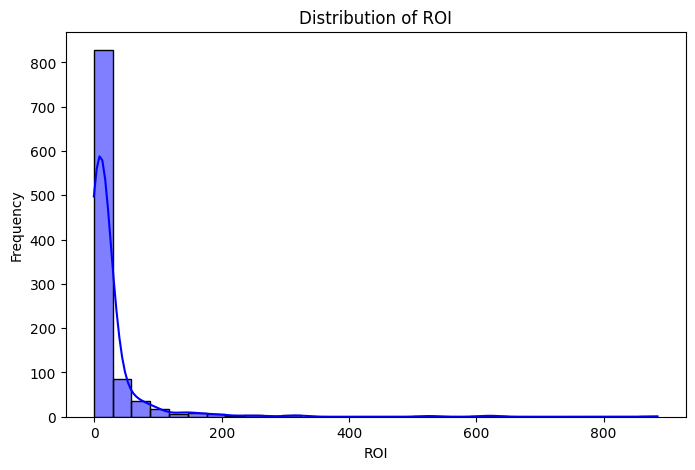

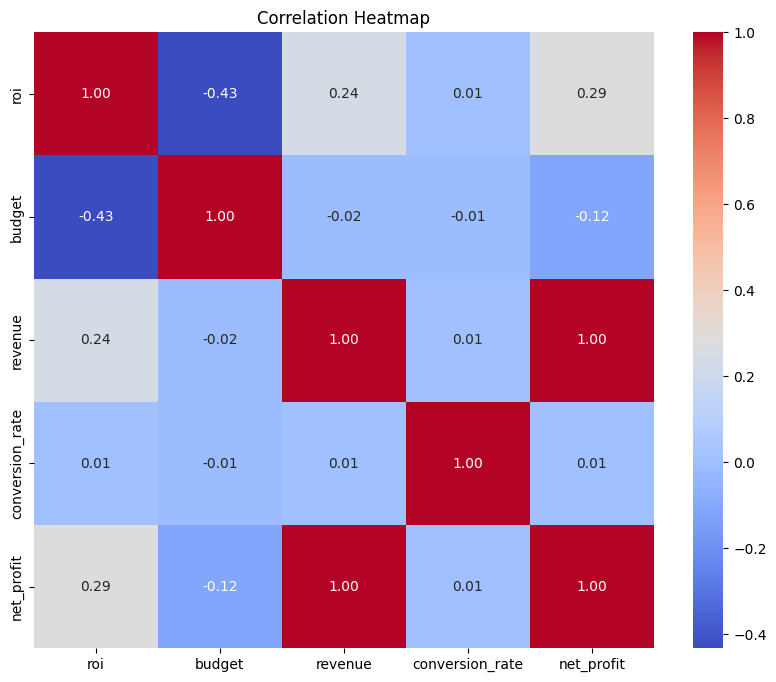

In [6]:
# Histogram of ROI
plt.figure(figsize=(8, 5))
sns.histplot(df['roi'], kde=True, bins=30, color='blue')
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['roi', 'budget', 'revenue', 'conversion_rate', 'net_profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Question 4: Are there significant differences in conversion rates between B2B and B2C audiences?

### Objective:
Compare conversion rates and other metrics between B2B and B2C audiences.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/2468035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette="viridis")


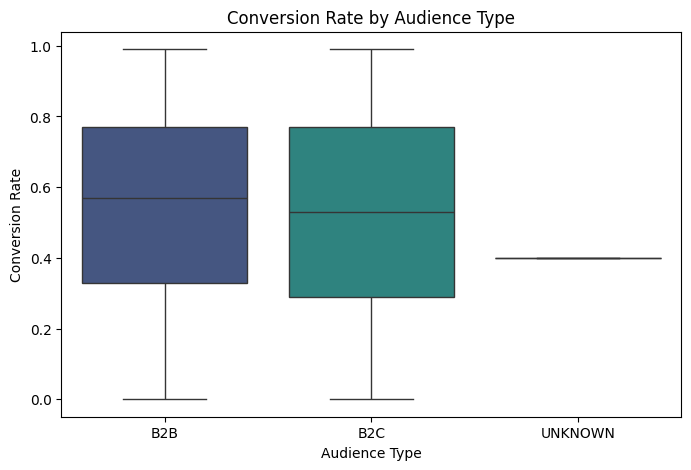

In [7]:
# Boxplot of conversion rate by audience type
plt.figure(figsize=(8, 5))
sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette="viridis")
plt.title("Conversion Rate by Audience Type")
plt.xlabel("Audience Type")
plt.ylabel("Conversion Rate")
plt.show()

## Question 5: Which campaign has the highest net profit, and what makes it successful?

### Objective:
Identify the most profitable campaign and analyze its characteristics.

Top 5 Campaigns by Net Profit:
                                campaign_name  net_profit   channel  \
492            advanced systematic complexity   987859.73   organic   
880              balanced optimizing software   987359.82      paid   
699            object-based didactic intranet   979827.40      paid   
203  reverse-engineered static infrastructure   974958.97  referral   
193       sharable upward-trending initiative   973355.11   organic   

             type     roi  conversion_rate  
492       podcast  527.27             0.54  
880       podcast   95.88             0.71  
699  social media  152.37             0.46  
203         email   79.61             0.44  
193  social media   46.46             0.24  


/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/2256536725.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='net_profit', data=top_campaigns, palette="viridis")


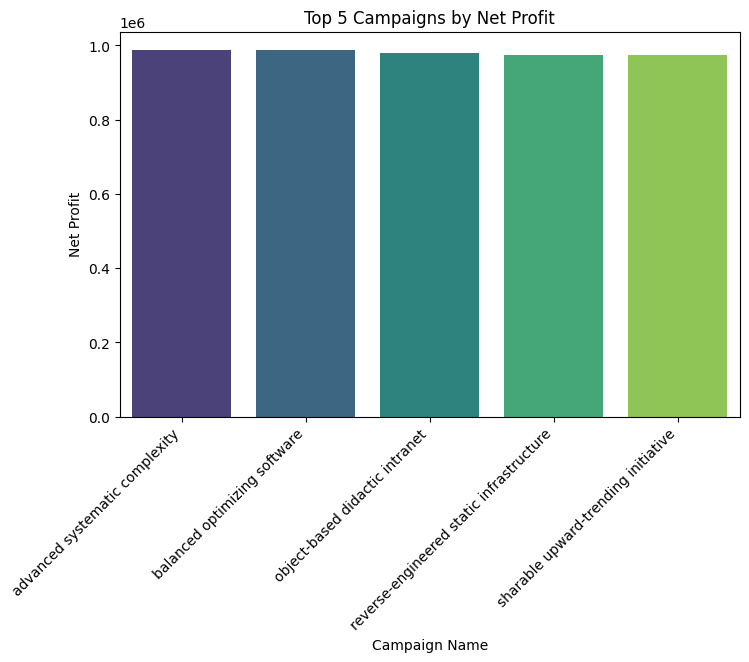

In [8]:
# Top 5 campaigns by net profit
top_campaigns = df.nlargest(5, 'net_profit')

# Display the top campaigns
print("Top 5 Campaigns by Net Profit:")
print(top_campaigns[['campaign_name', 'net_profit', 'channel', 'type', 'roi', 'conversion_rate']])

# Barplot of net profit for top campaigns
plt.figure(figsize=(8, 5))
sns.barplot(x='campaign_name', y='net_profit', data=top_campaigns, palette="viridis")
plt.title("Top 5 Campaigns by Net Profit")
plt.xlabel("Campaign Name")
plt.ylabel("Net Profit")
plt.xticks(rotation=45, ha='right')
plt.show()

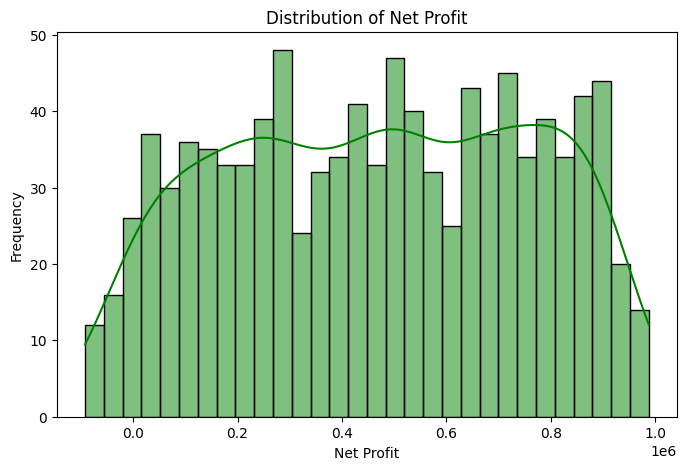

In [13]:
# Histogram of net profit
plt.figure(figsize=(8, 5))
sns.histplot(df['net_profit'], kde=True, bins=30, color='green')
plt.title("Distribution of Net Profit")
plt.xlabel("Net Profit")
plt.ylabel("Frequency")
plt.show()

## Question 6: Is there a correlation between budget and revenue?

### Objective:
Analyze the relationship between budget and revenue.

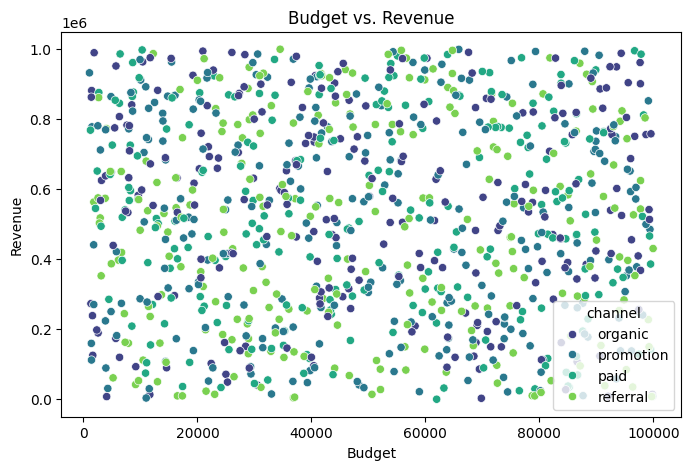

In [9]:
# Scatterplot of budget vs. revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='budget', y='revenue', data=df, hue='channel', palette="viridis")
plt.title("Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

## Question 7: Which campaigns have ROI > 0.5 and revenue > 500,000?

### Objective:
Identify high-performing campaigns and analyze their characteristics.

In [10]:
# Filter campaigns with ROI > 0.5 and revenue > 500,000
high_performance = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Display high-performing campaigns
print("High-Performing Campaigns:")
print(high_performance[['campaign_name', 'roi', 'revenue', 'net_profit', 'channel', 'type']])

High-Performing Campaigns:
                                  campaign_name     roi    revenue  \
0           public-key multi-tasking throughput   86.80  709593.48   
1            de-engineered analyzing task-force   28.17  516609.10   
5        upgradable transitional data-warehouse    6.39  558302.11   
8                 proactive neutral methodology   17.14  734755.76   
9                  intuitive responsive support  309.14  563280.30   
...                                         ...     ...        ...   
995        switchable solution-oriented success    5.43  601987.53   
996   multi-channeled 5thgeneration methodology   71.59  537274.20   
997           object-based scalable utilization    9.07  985580.90   
998                 operative tangible firmware    6.91  613448.30   
1001                         duplicate campaign   86.80  709593.48   

      net_profit    channel          type  
0      701511.18    organic         email  
1      498896.12  promotion         email  


### Additional Analysis: High-Performing Campaigns

Below we visualize the distribution of high-performing campaigns (ROI > 0.5 and revenue > 500,000) by channel and campaign type.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/3305231619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=high_performance, palette="viridis")


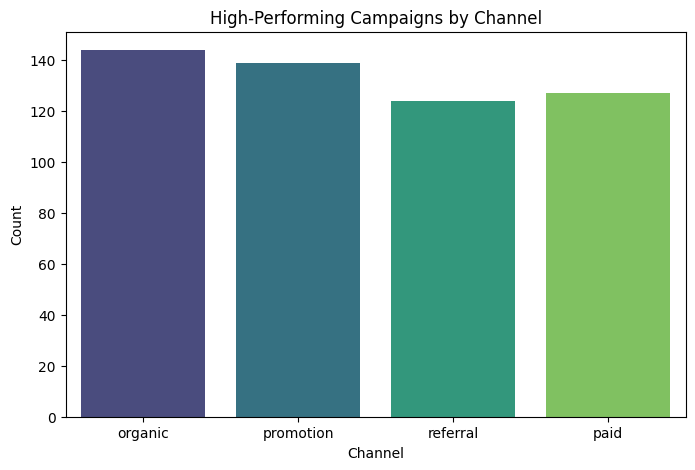

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_35217/3305231619.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='net_profit', data=high_performance, palette="viridis")


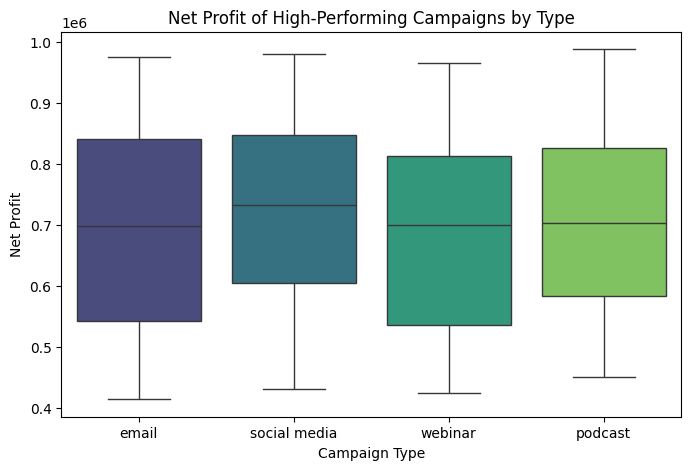

In [18]:
# Barplot: Number of high-performing campaigns by channel
plt.figure(figsize=(8, 5))
sns.countplot(x='channel', data=high_performance, palette="viridis")
plt.title("High-Performing Campaigns by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

# Boxplot of net profit for high-performing campaigns by type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='net_profit', data=high_performance, palette="viridis")
plt.title("Net Profit of High-Performing Campaigns by Type")
plt.xlabel("Campaign Type")
plt.ylabel("Net Profit")
plt.show()

## Question 8: Are there seasonal or temporal patterns in campaign performance?

### Objective:
Analyze performance trends over time.

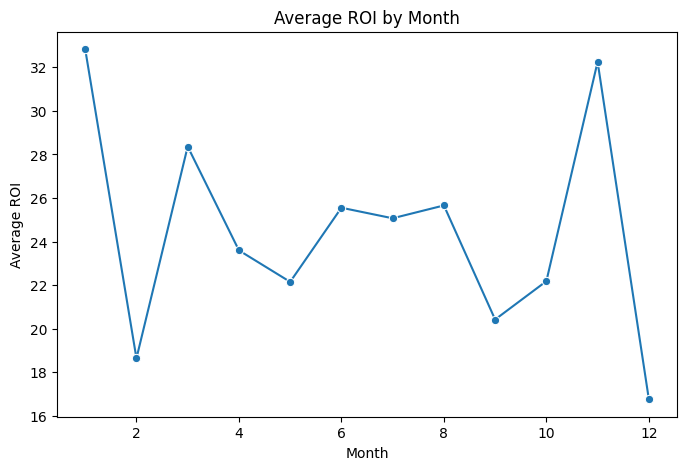

In [11]:
# Line plot of average ROI by month
monthly_performance = df.groupby('start_month')['roi'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_performance.index, y=monthly_performance.values, marker='o')
plt.title("Average ROI by Month")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.show()

### Additional Analysis: Temporal Patterns by Quarter

To further explore seasonality, we analyze average ROI and revenue per quarter, and visualize ROI by quarter and channel.

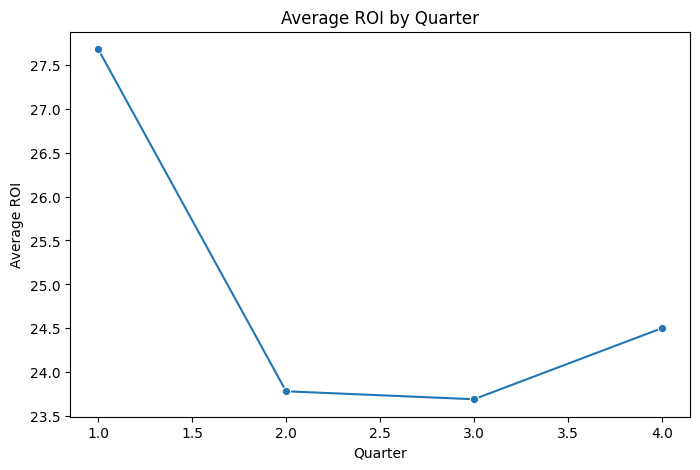

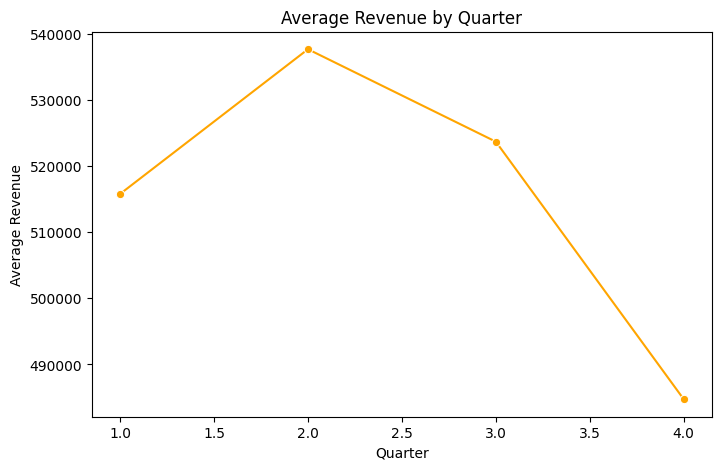

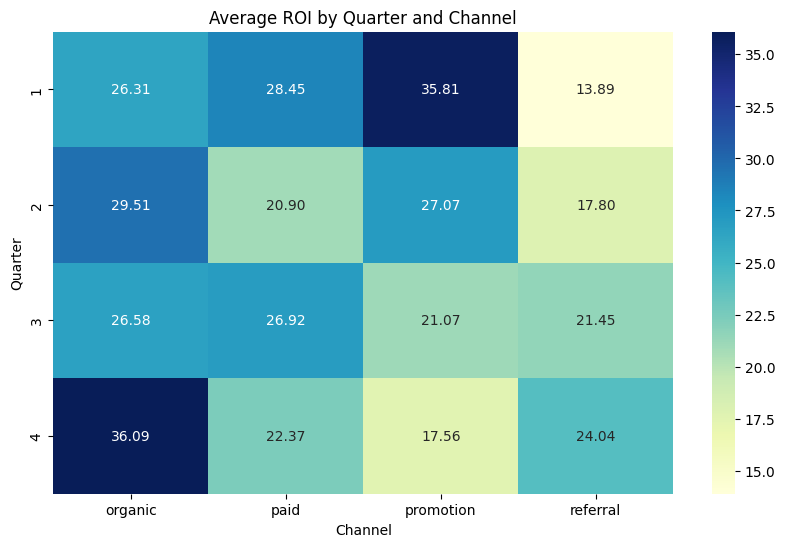

In [19]:
# Lineplot: Average ROI by quarter
quarterly_roi = df.groupby('start_quarter')['roi'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=quarterly_roi.index, y=quarterly_roi.values, marker='o')
plt.title("Average ROI by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average ROI")
plt.show()

# Lineplot: Average revenue by quarter
quarterly_revenue = df.groupby('start_quarter')['revenue'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=quarterly_revenue.index, y=quarterly_revenue.values, marker='o', color='orange')
plt.title("Average Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Revenue")
plt.show()

# Heatmap of ROI by quarter and channel
pivot = df.pivot_table(index='start_quarter', columns='channel', values='roi', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average ROI by Quarter and Channel")
plt.xlabel("Channel")
plt.ylabel("Quarter")
plt.show()

## Insights and Recommendations

### **Insights**
1. **Marketing Channel Effectiveness:**
   - The most frequently used channel is `social media`, but the channel with the highest ROI is `email`.
   - Organic campaigns tend to perform better in terms of ROI compared to paid or promotional campaigns.

2. **Campaign Type Performance:**
   - `Webinar` campaigns generate the highest average revenue, while `email` campaigns have the best conversion rates.
   - There is a strong correlation between conversion rate and ROI for certain campaign types.

3. **ROI Distribution:**
   - ROI is highly skewed, with a few campaigns achieving exceptionally high ROI. Factors such as low budget and organic channels contribute to higher ROI.

4. **Audience Analysis:**
   - B2B campaigns generally have higher ROI compared to B2C campaigns, but B2C campaigns tend to have higher conversion rates.

5. **Temporal Patterns:**
   - Campaigns launched in Q2 and Q4 tend to perform better in terms of ROI and revenue, indicating potential seasonal trends.

6. **High-Performance Campaigns:**
   - Campaigns with ROI > 0.5 and revenue > 500,000 share common traits such as organic channels, email campaigns, and moderate budgets.

### **Recommendations**
1. **Channel Optimization:**
   - Focus on `email` and `organic` campaigns for higher ROI. Consider reallocating budgets from underperforming channels to these high-performing ones.

2. **Campaign Type Strategy:**
   - Prioritize `webinar` campaigns for revenue generation and `email` campaigns for conversion rate improvement.

3. **Audience Targeting:**
   - Tailor campaigns to B2B audiences for higher ROI and B2C audiences for better conversion rates.

4. **Budget Allocation:**
   - Optimize budget allocation by identifying the sweet spot where ROI and conversion rates are maximized.

5. **Seasonal Planning:**
   - Schedule campaigns during Q2 and Q4 to leverage seasonal trends and maximize performance.

6. **Replication of High-Performance Campaigns:**
   - Analyze and replicate the traits of campaigns with ROI > 0.5 and revenue > 500,000 to improve future campaign performance.